#Question#1

##Creating Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/MyDrive/COMP-8610/Datasets'
%ls

/content/drive/MyDrive/COMP-8610/Datasets


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(1)
x = np.random.normal(0, 1, 5000)
eps = np.random.normal(0, np.sqrt(0.25), 5000)
y = -1 + 0.5 * x - 2 * x**2 + 0.3 * x**3 + eps

In [ ]:
len(x), len(y)

(5000, 5000)

In [ ]:
x0 = [1]*5000

In [ ]:
data = pd.DataFrame(x0, columns=['x0'])
data["x"]=x
data["x2"]=x**2
data["x3"]=x**3
data["y"]=y

In [ ]:
data

,x0,x,x2,x3,y
0,1,1.624345,2.638498,4.285832,-4.641451
1,1,-0.611756,0.374246,-0.228947,-1.558609
2,1,-0.528172,0.278965,-0.147342,-2.430615
3,1,-1.072969,1.151262,-1.235268,-4.571957
4,1,0.865408,0.748930,0.648130,-1.558932
...,...,...,...,...,...
4995,1,1.604546,2.574569,4.131014,-4.071081
4996,1,0.566613,0.321050,0.181911,-1.059670
4997,1,-0.775988,0.602157,-0.467267,-3.239560
4998,1,1.084889,1.176983,1.276896,-2.459802


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
data.to_csv('Q1Dataset.csv', index=False)

#Importing Dataset

In [ ]:
data = pd.read_csv('/content/Q1Dataset.csv')
data

,x0,x,x2,x3,y
0,1,1.624345,2.638498,4.285832,-4.641451
1,1,-0.611756,0.374246,-0.228947,-1.558609
2,1,-0.528172,0.278965,-0.147342,-2.430615
3,1,-1.072969,1.151262,-1.235268,-4.571957
4,1,0.865408,0.748930,0.648130,-1.558932
...,...,...,...,...,...
4995,1,1.604546,2.574569,4.131014,-4.071081
4996,1,0.566613,0.321050,0.181911,-1.059670
4997,1,-0.775988,0.602157,-0.467267,-3.239560
4998,1,1.084889,1.176983,1.276896,-2.459802


In [ ]:
weights = np.random.rand(data.shape[1]-1)
weights

array([0.18505826, 0.25349828, 0.80876402, 0.04766132])

##Adaline Neuron

###BGD test 0.3

In [ ]:
learning_rate = 0.1
epochs = 20

In [ ]:
def adaline_activation(weighted_sum):
  return weighted_sum


In [ ]:
def adaline_bgd(data, labels, learning_rate=0.001, epochs=5):
  weights = np.array([0.30903487, 0.14895414, 0.71205955, 0.92752802])
  # print(weights)
  epoch_loss= []
  for i in range(epochs):
    iter_loss = []
    delta_weight = np.zeros(weights.shape)
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)
      prediction = adaline_activation(weighted_sum)
      loss = 1/2*((target-prediction)**2)
      iter_loss.append(loss)
      delta_weight = delta_weight + learning_rate*((target-prediction)*row_j)

    weights = weights + delta_weight
    average_loss = sum(iter_loss)/len(iter_loss)
    epoch_loss.append(average_loss)
    print(f"Epoch {i} loss: {average_loss}")

  print(f"Average loss of all epochs {sum(epoch_loss)/len(epoch_loss)}", "\n")
  return weights

def pred_adaline_bgd(data, weights):
  w_sum =  np.dot(data, weights)
  return adaline_activation(w_sum)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(data.iloc[:, :-1])
scaled_data = pd.DataFrame(scaled_data, columns=["x0", "x", "x2", "x3"])
scaled_data["y"]= data.iloc[:, -1]

In [ ]:
train_data, test_data = train_test_split(scaled_data , test_size=0.3, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []


for train_index, val_index in kf.split(X_train):
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = adaline_bgd(train_data, train_labels)

    val_pred = pred_adaline_bgd(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

Epoch 0 loss: 10.264171563813635
Epoch 1 loss: 25.594083515802275
Epoch 2 loss: 87.70262677332573
Epoch 3 loss: 432.31578064564894
Epoch 4 loss: 3833.9714923276842
Average loss of all epochs 877.9696309652551 

Epoch 0 loss: 9.935846222070897
Epoch 1 loss: 22.086556139466563
Epoch 2 loss: 61.74810967852307
Epoch 3 loss: 191.41350940428617
Epoch 4 loss: 618.7845814705396
Average loss of all epochs 180.79372058297727 

Epoch 0 loss: 10.321550774167813
Epoch 1 loss: 26.935965293534494
Epoch 2 loss: 105.61363430312555
Epoch 3 loss: 699.9934709841557
Epoch 4 loss: 8285.066265679654
Average loss of all epochs 1825.5861774069276 

Epoch 0 loss: 10.380020145616601
Epoch 1 loss: 27.0289478356637
Epoch 2 loss: 91.73906550074702
Epoch 3 loss: 347.3884365046205
Epoch 4 loss: 1435.1784233889357
Average loss of all epochs 382.3429786751167 

Epoch 0 loss: 10.485065940011879
Epoch 1 loss: 28.143268462397774
Epoch 2 loss: 99.54057097908198
Epoch 3 loss: 406.66989670330173
Epoch 4 loss: 2073.2986935462

In [ ]:
test_pred = pred_adaline_bgd(X_test, weights)
test_mse = mean_squared_error(y_test, test_pred)
print("The mean squared error on the test dataset is:", test_mse)

The mean squared error on the test dataset is: 127777.11387801035


###SGD test 0.3

In [ ]:
learning_rate = 0.5
epochs = 20


In [ ]:
def adaline_activation(weighted_sum):
  return weighted_sum

def update_weights(row_j, weights, learning_rate, target, prediction):
  updated_weights = []
  for row, weight in zip(row_j, weights):
    updated_weights.append(weight+learning_rate*(target-prediction)*row)
  return updated_weights

In [ ]:
def adaline_sgd(data, labels, learning_rate=0.01, epochs=5):
  weights = np.array([0.30903487, 0.14895414, 0.71205955, 0.92752802])
  epoch_loss= []
  for i in range(epochs):
    iter_loss = []
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)
      prediction = adaline_activation(weighted_sum)
      loss = 1/2*((target-prediction)**2)
      iter_loss.append(loss)
      weights = update_weights(row_j, weights, learning_rate, target, prediction)
    average_loss = sum(iter_loss)/len(iter_loss)
    epoch_loss.append(average_loss)
    print(f"Epoch {i} loss: {average_loss}")

  print(f"\nAverage loss of all epochs {sum(epoch_loss)/len(epoch_loss)}")
  return weights

def pred_adaline_sgd(data, weights):
  w_sum =  np.dot(data, weights)
  return adaline_activation(w_sum)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(data.iloc[:, :-1])
scaled_data = pd.DataFrame(scaled_data, columns=["x0", "x", "x2", "x3"])
scaled_data["y"]= data.iloc[:, -1]

In [ ]:
train_data, test_data = train_test_split(scaled_data , test_size=0.3, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []


for train_index, val_index in kf.split(X_train):
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = adaline_sgd(train_data, train_labels)

    val_pred = pred_adaline_sgd(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

Epoch 0 loss: 4.762784785812472
Epoch 1 loss: 4.629974867154229
Epoch 2 loss: 4.629993172466103
Epoch 3 loss: 4.629993217818829
Epoch 4 loss: 4.629993217931058

Average loss of all epochs 4.656547852236538
Epoch 0 loss: 4.786053431429406
Epoch 1 loss: 4.654122897248732
Epoch 2 loss: 4.654123695715276
Epoch 3 loss: 4.654123698066083
Epoch 4 loss: 4.654123698073008

Average loss of all epochs 4.680509484106501
Epoch 0 loss: 4.781926541896897
Epoch 1 loss: 4.6507636775773
Epoch 2 loss: 4.650768322825213
Epoch 3 loss: 4.65076833541313
Epoch 4 loss: 4.650768335447208

Average loss of all epochs 4.67699904263195
Epoch 0 loss: 4.800626234416332
Epoch 1 loss: 4.669889666450816
Epoch 2 loss: 4.6698954241095105
Epoch 3 loss: 4.669895436450207
Epoch 4 loss: 4.669895436476619

Average loss of all epochs 4.696040439580697
Epoch 0 loss: 4.774745137368379
Epoch 1 loss: 4.642167562987181
Epoch 2 loss: 4.642174980503579
Epoch 3 loss: 4.642174997637269
Epoch 4 loss: 4.642174997676796

Average loss of al

In [ ]:
test_pred = pred_adaline_sgd(X_test, weights)
test_mse = mean_squared_error(y_test, test_pred)
print("The mean squared error on the test dataset is:", test_mse)

The mean squared error on the test dataset is: 9.30801600795323


##Sigmoid Neuron

###BGD test 0.3

In [ ]:
learning_rate = 0.1
epochs = 20


In [ ]:
def sigmoid_activation(weighted_sum):
  return 1/(1+np.exp(-weighted_sum))


In [ ]:
def sigmoid_bgd(data, labels, learning_rate=0.01, epochs=5):
  weights = np.array([0.30903487, 0.14895414, 0.71205955, 0.92752802])
  epoch_loss= []
  for i in range(epochs):
    iter_loss = []
    delta_weight = np.zeros(weights.shape)
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)
      prediction = sigmoid_activation(weighted_sum)
      loss = 1/2*((target-prediction)**2)
      iter_loss.append(loss)
      delta_weight = delta_weight + learning_rate*(target-prediction)*row_j

    weights = weights + delta_weight
    average_loss = sum(iter_loss)/len(iter_loss)
    epoch_loss.append(average_loss)
    print(f"Epoch {i} loss: {average_loss}")

  print(f"\nAverage loss of all epochs {sum(epoch_loss)/len(epoch_loss)}")
  return weights


def pred_sigmoid_bgd(data, weights):
  w_sum =  np.dot(data, weights)
  return sigmoid_activation(w_sum)

In [ ]:
train_data, test_data = train_test_split(data , test_size=0.3, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []


for train_index, val_index in kf.split(X_train):
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = sigmoid_bgd(train_data, train_labels)

    val_pred = pred_sigmoid_bgd(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

Epoch 0 loss: 10.790205697531055


<ipython-input-24-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.291896890632573
Epoch 2 loss: 9.344830610087216
Epoch 3 loss: 9.36777479578558
Epoch 4 loss: 9.371134898376914

Average loss of all epochs 9.633168578482667
Epoch 0 loss: 10.374946586085073


<ipython-input-24-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 8.782037310266348
Epoch 2 loss: 8.853120435841562
Epoch 3 loss: 8.867982069434568
Epoch 4 loss: 8.877685480212662

Average loss of all epochs 9.151154376368043
Epoch 0 loss: 10.902930416508328


<ipython-input-24-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.45203247344035
Epoch 2 loss: 9.513439367725242
Epoch 3 loss: 9.522822605382572
Epoch 4 loss: 9.528721505016932

Average loss of all epochs 9.783989273614685
Epoch 0 loss: 10.763658699531696


<ipython-input-24-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.204815488864643
Epoch 2 loss: 9.272338223131765
Epoch 3 loss: 9.282485740005397
Epoch 4 loss: 9.292490003732519

Average loss of all epochs 9.563157631053205
Epoch 0 loss: 10.905484541823883


<ipython-input-24-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.395793659582322
Epoch 2 loss: 9.455849308759298
Epoch 3 loss: 9.473260324120234
Epoch 4 loss: 9.477648928382681

Average loss of all epochs 9.741607352533682
Epoch 0 loss: 10.702817201761897


<ipython-input-24-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.238545280434934
Epoch 2 loss: 9.297852345729996
Epoch 3 loss: 9.30762198337433
Epoch 4 loss: 9.318293564138425

Average loss of all epochs 9.573026075087915
Epoch 0 loss: 10.728443401179703


<ipython-input-24-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.219745114253557
Epoch 2 loss: 9.28605481322846
Epoch 3 loss: 9.29850199019996
Epoch 4 loss: 9.303961776342348

Average loss of all epochs 9.567341419040805
Epoch 0 loss: 10.701513273950203


<ipython-input-24-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.148710378766317
Epoch 2 loss: 9.216262230330344
Epoch 3 loss: 9.22752930995808
Epoch 4 loss: 9.23871112328738

Average loss of all epochs 9.506545263258465
Epoch 0 loss: 10.807770441006252


<ipython-input-24-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.327263046890566
Epoch 2 loss: 9.390942832635659
Epoch 3 loss: 9.401319564613495
Epoch 4 loss: 9.411288855529664

Average loss of all epochs 9.667716948135126
Epoch 0 loss: 10.821420789810277


<ipython-input-24-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.347469354491842
Epoch 2 loss: 9.403313816165003
Epoch 3 loss: 9.417344452220886
Epoch 4 loss: 9.420250652549127

Average loss of all epochs 9.681959813047428
Average Validation Loss: 18.63146865836828


In [ ]:
test_pred = pred_sigmoid_bgd(X_test, weights)
test_mse = mean_squared_error(y_test, test_pred)
print("The mean squared error on the test dataset is:", test_mse)

The mean squared error on the test dataset is: 21.968655431022817


<ipython-input-24-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


###BGD test 0.2, lr 0.01

In [ ]:
learning_rate = 0.1
epochs = 20


In [ ]:
def sigmoid_activation(weighted_sum):
  return 1/(1+np.exp(-weighted_sum))


In [ ]:
def sigmoid_bgd(data, labels, learning_rate=0.01, epochs=5):
  weights = np.array([0.30903487, 0.14895414, 0.71205955, 0.92752802])
  epoch_loss= []
  for i in range(epochs):
    iter_loss = []
    delta_weight = np.zeros(weights.shape)
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)
      prediction = sigmoid_activation(weighted_sum)
      loss = 1/2*((target-prediction)**2)
      iter_loss.append(loss)
      delta_weight = delta_weight + learning_rate*(target-prediction)*row_j

    weights = weights + delta_weight
    average_loss = sum(iter_loss)/len(iter_loss)
    epoch_loss.append(average_loss)
    print(f"Epoch {i} loss: {average_loss}")

  print(f"\nAverage loss of all epochs {sum(epoch_loss)/len(epoch_loss)}")
  return weights


def pred_sigmoid_bgd(data, weights):
  w_sum =  np.dot(data, weights)
  return sigmoid_activation(w_sum)

In [ ]:
train_data, test_data = train_test_split(data , test_size=0.2, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []


for train_index, val_index in kf.split(X_train):
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = sigmoid_bgd(train_data, train_labels)

    val_pred = pred_sigmoid_bgd(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

Epoch 0 loss: 11.10442748032257


<ipython-input-35-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.523106412965026
Epoch 2 loss: 9.589110245784013
Epoch 3 loss: 9.60769880927719
Epoch 4 loss: 9.617810093023632

Average loss of all epochs 9.888430608274486
Epoch 0 loss: 11.005186473753964


<ipython-input-35-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.443717904174688
Epoch 2 loss: 9.509969470854754
Epoch 3 loss: 9.533510079383264
Epoch 4 loss: 9.535542903614658

Average loss of all epochs 9.805585366356265
Epoch 0 loss: 10.791049632012172


<ipython-input-35-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.156933951212627
Epoch 2 loss: 9.222623472438267
Epoch 3 loss: 9.247361964550512
Epoch 4 loss: 9.258641408461491

Average loss of all epochs 9.535322085735014
Epoch 0 loss: 11.020593868860871


<ipython-input-35-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.446037384183613
Epoch 2 loss: 9.506912085606766
Epoch 3 loss: 9.530997352673392
Epoch 4 loss: 9.532055742800903

Average loss of all epochs 9.80731928682511
Epoch 0 loss: 11.228544507333854


<ipython-input-35-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.717746971490783
Epoch 2 loss: 9.774275792312412
Epoch 3 loss: 9.78706116880099
Epoch 4 loss: 9.794356428409703

Average loss of all epochs 10.06039697366955
Epoch 0 loss: 10.77708061227688


<ipython-input-35-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.254949449513418
Epoch 2 loss: 9.310782861315776
Epoch 3 loss: 9.328434334065326
Epoch 4 loss: 9.331357894683986

Average loss of all epochs 9.600521030371079
Epoch 0 loss: 11.053758045724223


<ipython-input-35-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.544987335760007
Epoch 2 loss: 9.604993344374762
Epoch 3 loss: 9.621333849542554
Epoch 4 loss: 9.623577920425467

Average loss of all epochs 9.889730099165401
Epoch 0 loss: 11.28833288163907


<ipython-input-35-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.805594758447873
Epoch 2 loss: 9.865739655411764
Epoch 3 loss: 9.876517322587693
Epoch 4 loss: 9.879104286390787

Average loss of all epochs 10.143057780895436
Epoch 0 loss: 11.02182203288677


<ipython-input-35-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.37774106164947
Epoch 2 loss: 9.449312297213185
Epoch 3 loss: 9.47107316046789
Epoch 4 loss: 9.48208543669567

Average loss of all epochs 9.760406797782597
Epoch 0 loss: 11.00251971777663


<ipython-input-35-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.428088838347712
Epoch 2 loss: 9.494288171855514
Epoch 3 loss: 9.507286218242601
Epoch 4 loss: 9.515818335640606

Average loss of all epochs 9.789600256372612
Average Validation Loss: 19.133661032144722


In [ ]:
test_pred = pred_sigmoid_bgd(X_test, weights)
test_mse = mean_squared_error(y_test, test_pred)
print("The mean squared error on the test dataset is:", test_mse)

The mean squared error on the test dataset is: 21.968655431022817


<ipython-input-24-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


###SGD test 0.3

In [ ]:
# bias=1
learning_rate = 0.5
epochs = 20


In [ ]:
def sigmoid_activation(weighted_sum):
  return 1/(1+np.exp(-weighted_sum))

def update_weights(row_j, weights, learning_rate, target, prediction):
  updated_weights = []
  for row, weight in zip(row_j, weights):
    updated_weights.append(weight+learning_rate*(target-prediction)*row)
  return updated_weights

In [ ]:
def sigmoid_sgd(data, labels, learning_rate=0.5, epochs=5):
  weights = np.array([0.30903487, 0.14895414, 0.71205955, 0.92752802])
  epoch_loss= []
  for i in range(epochs):
    iter_loss = []
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)
      prediction = sigmoid_activation(weighted_sum)
      loss = 1/2*((target-prediction)**2)
      iter_loss.append(loss)
      weights = update_weights(row_j, weights, learning_rate, target, prediction)
    average_loss = sum(iter_loss)/len(iter_loss)
    epoch_loss.append(average_loss)
    print(f"Epoch {i} loss: {average_loss}")

  print(f"Average loss of all epochs {sum(epoch_loss)/len(epoch_loss)}","\n")
  return weights

def pred_sigmoid_sgd(data, weights):
  w_sum =  np.dot(data, weights)
  return sigmoid_activation(w_sum)


In [ ]:
train_data, test_data = train_test_split(data , test_size=0.3, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []


for train_index, val_index in kf.split(X_train):
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = sigmoid_sgd(train_data, train_labels)

    val_pred = pred_sigmoid_sgd(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

<ipython-input-30-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.507239375373366
Epoch 1 loss: 9.402298793968136
Epoch 2 loss: 9.393743049424863
Epoch 3 loss: 9.390515958178614
Epoch 4 loss: 9.390623673905852
Average loss of all epochs 9.416884170170167 



<ipython-input-30-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 8.963092049683933
Epoch 1 loss: 8.90408242405568
Epoch 2 loss: 8.89928569666668
Epoch 3 loss: 8.899285791163852
Epoch 4 loss: 8.899285791163852
Average loss of all epochs 8.9130063505468 



<ipython-input-30-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.625723870636373
Epoch 1 loss: 9.555185468912779
Epoch 2 loss: 9.549825544295473
Epoch 3 loss: 9.54831232174467
Epoch 4 loss: 9.54693290946415
Average loss of all epochs 9.565196023010689 



<ipython-input-30-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.455533168629778
Epoch 1 loss: 9.34406251828429
Epoch 2 loss: 9.322784355313496
Epoch 3 loss: 9.313087781717144
Epoch 4 loss: 9.309734864663803
Average loss of all epochs 9.349040537721702 



<ipython-input-30-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.616856796228271
Epoch 1 loss: 9.51384840633331
Epoch 2 loss: 9.506671842257232
Epoch 3 loss: 9.506754340049948
Epoch 4 loss: 9.502062636586064
Average loss of all epochs 9.529238804290964 



<ipython-input-30-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.472034837164752
Epoch 1 loss: 9.349486575634046
Epoch 2 loss: 9.335021427144364
Epoch 3 loss: 9.329476850516075
Epoch 4 loss: 9.329476850516075
Average loss of all epochs 9.363099308195062 



<ipython-input-30-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.438902556273803
Epoch 1 loss: 9.337274883328599
Epoch 2 loss: 9.328817209255082
Epoch 3 loss: 9.32693035113533
Epoch 4 loss: 9.321741000729585
Average loss of all epochs 9.350733200144479 



<ipython-input-30-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.407776440889965
Epoch 1 loss: 9.293378077357012
Epoch 2 loss: 9.271161980662017
Epoch 3 loss: 9.263944699870839
Epoch 4 loss: 9.256216996213453
Average loss of all epochs 9.298495638998657 



<ipython-input-30-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.528920015563614
Epoch 1 loss: 9.44329562194688
Epoch 2 loss: 9.433064214962192
Epoch 3 loss: 9.427318296778694
Epoch 4 loss: 9.428947090442259
Average loss of all epochs 9.452309047938728 



<ipython-input-30-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.541437096161637
Epoch 1 loss: 9.454918057143924
Epoch 2 loss: 9.44309415576257
Epoch 3 loss: 9.441680055473004
Epoch 4 loss: 9.443349494472965
Average loss of all epochs 9.464895771802821 

Average Validation Loss: 18.638003734046627


In [ ]:
test_pred = pred_sigmoid_sgd(X_test, weights)
test_mse = mean_squared_error(y_test, test_pred)
print("The mean squared error on the test dataset is:", test_mse)

The mean squared error on the test dataset is: 21.981648102042715


<ipython-input-30-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


###SGD test 0.2, lr = 0.01

In [ ]:
# bias=1
learning_rate = 0.5
epochs = 20


In [ ]:
def sigmoid_activation(weighted_sum):
  return 1/(1+np.exp(-weighted_sum))

def update_weights(row_j, weights, learning_rate, target, prediction):
  updated_weights = []
  for row, weight in zip(row_j, weights):
    updated_weights.append(weight+learning_rate*(target-prediction)*row)
  return updated_weights

In [ ]:
def sigmoid_sgd(data, labels, learning_rate=0.01, epochs=5):
  weights = np.array([0.30903487, 0.14895414, 0.71205955, 0.92752802])
  epoch_loss= []
  for i in range(epochs):
    iter_loss = []
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)
      prediction = sigmoid_activation(weighted_sum)
      loss = 1/2*((target-prediction)**2)
      iter_loss.append(loss)
      weights = update_weights(row_j, weights, learning_rate, target, prediction)
    average_loss = sum(iter_loss)/len(iter_loss)
    epoch_loss.append(average_loss)
    print(f"Epoch {i} loss: {average_loss}")

  print(f"Average loss of all epochs {sum(epoch_loss)/len(epoch_loss)}","\n")
  return weights

def pred_sigmoid_sgd(data, weights):
  w_sum =  np.dot(data, weights)
  return sigmoid_activation(w_sum)


In [ ]:
train_data, test_data = train_test_split(data , test_size=0.3, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []


for train_index, val_index in kf.split(X_train):
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = sigmoid_sgd(train_data, train_labels)

    val_pred = pred_sigmoid_sgd(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

<ipython-input-40-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.530516496934924
Epoch 1 loss: 9.402788999422743
Epoch 2 loss: 9.394624656460524
Epoch 3 loss: 9.391893955041292
Epoch 4 loss: 9.390629989719965
Average loss of all epochs 9.42209081951589 



<ipython-input-40-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 8.987171673734013
Epoch 1 loss: 8.905203756091835
Epoch 2 loss: 8.899445939268409
Epoch 3 loss: 8.899223079385996
Epoch 4 loss: 8.89924311431733
Average loss of all epochs 8.918057512559518 



<ipython-input-40-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.643324807105607
Epoch 1 loss: 9.556694176577528
Epoch 2 loss: 9.55061776275523
Epoch 3 loss: 9.548192575987253
Epoch 4 loss: 9.546925692284512
Average loss of all epochs 9.569151002942025 



<ipython-input-40-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.480793021199196
Epoch 1 loss: 9.345398004681615
Epoch 2 loss: 9.32442767798434
Epoch 3 loss: 9.313246743169113
Epoch 4 loss: 9.310198984540165
Average loss of all epochs 9.354812886314885 



<ipython-input-40-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.637908256333414
Epoch 1 loss: 9.515581405390167
Epoch 2 loss: 9.511454603468003
Epoch 3 loss: 9.506658472923467
Epoch 4 loss: 9.503372647417256
Average loss of all epochs 9.534995077106462 



<ipython-input-40-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.486484338890289
Epoch 1 loss: 9.350587130592434
Epoch 2 loss: 9.335463807350608
Epoch 3 loss: 9.33037995492576
Epoch 4 loss: 9.329476875468965
Average loss of all epochs 9.36647842144561 



<ipython-input-40-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.458784634860027
Epoch 1 loss: 9.338128178284233
Epoch 2 loss: 9.33002255126511
Epoch 3 loss: 9.327350488227387
Epoch 4 loss: 9.32241631464659
Average loss of all epochs 9.35534043345667 



<ipython-input-40-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.426842760981836
Epoch 1 loss: 9.295078418970443
Epoch 2 loss: 9.27140457147667
Epoch 3 loss: 9.266064820711712
Epoch 4 loss: 9.256381432286787
Average loss of all epochs 9.30315440088549 



<ipython-input-40-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.547324295916715
Epoch 1 loss: 9.443540359940682
Epoch 2 loss: 9.433166403021785
Epoch 3 loss: 9.428445942927011
Epoch 4 loss: 9.430276165780608
Average loss of all epochs 9.456550633517361 



<ipython-input-40-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 0 loss: 9.56398744999965
Epoch 1 loss: 9.45600921425683
Epoch 2 loss: 9.44434524636398
Epoch 3 loss: 9.443155414751931
Epoch 4 loss: 9.443506555027687
Average loss of all epochs 9.470200776080016 

Average Validation Loss: 18.640057301768024


In [ ]:
test_pred = pred_sigmoid_sgd(X_test, weights)
test_mse = mean_squared_error(y_test, test_pred)
print("The mean squared error on the test dataset is:", test_mse)

The mean squared error on the test dataset is: 21.985451663876354


<ipython-input-40-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


#Question#2

In [ ]:
import numpy as np
import pandas as pd

##Creating Dataset

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=5000, centers=2, n_features=2, center_box=(0, 20))

In [ ]:
count=0
for i, val in enumerate(y):
  if(val==0):
    y[i]=-1
y

array([ 1, -1,  1, ..., -1,  1, -1])

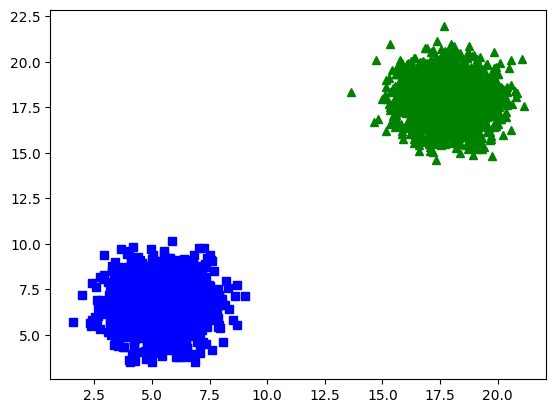

In [ ]:
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

In [ ]:
data = pd.DataFrame(X, columns=["x1", "x2"])
data["y"]=y

In [ ]:
data

,x1,x2,y
0,6.844521,8.556637,1
1,18.525043,18.528406,-1
2,5.569892,5.978973,1
3,17.939203,18.823726,-1
4,5.133102,6.785277,1
...,...,...,...
4995,17.808451,18.472278,-1
4996,18.005236,16.266956,-1
4997,17.471612,19.396800,-1
4998,4.071183,6.321154,1


In [ ]:
weights = np.random.rand(data.shape[1]-1)

##Perceptron

In [ ]:
# bias=1
learning_rate = 0.1
epochs = 20


In [ ]:
def perceptron_activation(weighted_sum):
  return np.where(weighted_sum>0.5,1 , -1)

def update_weights(row_j, weights, learning_rate, target, prediction):
  updated_weights = []
  for row, weight in zip(row_j, weights):
    updated_weights.append(weight+learning_rate*(target-prediction)*row)
  return updated_weights

In [ ]:
def perceptron(data, labels, learning_rate=0.01, epochs=10):
  t = 0
  correct_pred = 0
  weights = np.random.rand(data.shape[1])
  epoch_loss= []
  epoch_accuracy = []
  classification_error = 0
  while True:
    iter_loss = []
    classification_error = 0
    correct_pred = 0
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)+1
      prediction = perceptron_activation(weighted_sum)
      if(prediction==target):
        correct_pred+=1
      classification_error += (1/len(data))*(abs(1/2*(target-prediction)))
      weights = update_weights(row_j, weights, learning_rate, target, prediction)
    t=t+1
    accuracy = correct_pred/len(data)
    epoch_accuracy.append(accuracy)
    epoch_loss.append(classification_error)
    print(f"Epoch {t} loss: {classification_error}")
    print(f"Epoch {t} accuracy: {accuracy}")
    print(f"Weight: {weights}", "\n")

    if(classification_error <= 0.10 and t<30):
      return weights
      break;


  print(f"\nAverage loss of all epochs {sum(epoch_loss)/len(epoch_loss)}")
  return weights


def pred_perceptron(data, weights):
  w_sum =  np.dot(data, weights)
  return perceptron_activation(w_sum)

In [ ]:
train_data, test_data = train_test_split(data , test_size=0.2, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []

save_weights = []
for train_index, val_index in kf.split(X_train):
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = perceptron(train_data, train_labels)
    save_weights.append(weights)

    val_pred = pred_perceptron(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

Epoch 1 loss: 0.10000000000000035
Epoch 1 accuracy: 0.9
Weight: [0.09702827566958906, -0.47993618952996436] 

Epoch 2 loss: 0.16999999999999854
Epoch 2 accuracy: 0.83
Weight: [0.04224467089189714, -0.4788210550397476] 

Epoch 3 loss: 0.1808333333333314
Epoch 3 accuracy: 0.8191666666666667
Weight: [-0.13672504464055601, -0.5055735725248423] 

Epoch 4 loss: 0.14583333333333293
Epoch 4 accuracy: 0.8541666666666666
Weight: [0.09280112723518553, -0.4516044542922987] 

Epoch 5 loss: 0.15027777777777718
Epoch 5 accuracy: 0.8497222222222223
Weight: [0.04788032259600421, -0.4228139274095695] 

Epoch 6 loss: 0.16499999999999876
Epoch 6 accuracy: 0.835
Weight: [0.13138951815762728, -0.5124881440461595] 

Epoch 7 loss: 0.16833333333333195
Epoch 7 accuracy: 0.8316666666666667
Weight: [0.09605107344580123, -0.4754769470926498] 

Epoch 8 loss: 0.1922222222222198
Epoch 8 accuracy: 0.8077777777777778
Weight: [0.048676493856249656, -0.4503285224497738] 

Epoch 9 loss: 0.17388888888888726
Epoch 9 accurac

In [ ]:
save_weights

[[-0.1482748718652851, -0.4725182557908595],
 [-0.044006177338080196, -0.03234767721356979],
 [-0.051291870145019, -0.028885197360449345],
 [-0.038340506510743125, -0.03515703766752304],
 [-0.04056986919821426, -0.008537035292692334],
 [-0.024837783272245006, -0.04406447002648367],
 [-0.027016664064599932, -0.07512830613761459],
 [-0.03430355520281868, -0.07161521879431887],
 [0.1103792118507641, -0.4798323665517189],
 [-0.0423546595530796, -0.0480678679648206]]

In [ ]:
correct_pred=0
classification_error=0
predA = []
for j in range(len(X_test)):
  row_j = X_test.iloc[j]
  target = y_test.iloc[j]
  weighted_sum = np.dot(row_j, save_weights[5])+1
  prediction = perceptron_activation(weighted_sum)
  predA.append(prediction)
  if(prediction==target):
    correct_pred+=1
  classification_error += (1/len(data))*(abs(1/2*(y_test-prediction)))

accuracy = correct_pred/len(X_test)
print("Accuracy on test set is", accuracy)

Accuracy on test set is 1.0


## Pocket Algorithm

In [ ]:
learning_rate = 0.1
epochs = 20


In [ ]:
def perceptron_activation(weighted_sum):
  return np.where(weighted_sum>0.5,1 , -1)

def update_weights(row_j, weights, learning_rate, target, prediction):
  updated_weights = []
  for row, weight in zip(row_j, weights):
    updated_weights.append(weight+learning_rate*(target-prediction)*row)
  return updated_weights

In [ ]:
def pocket_algorithm(data, labels, learning_rate=0.01, epochs=20):
  t = 0
  correct_pred = 0
  weights = np.random.rand(data.shape[1])
  best_weights = weights.copy()
  best_classification_error=float('inf')
  epoch_loss= []
  classification_error = 0
  epoch_accuracy = []
  for i in range(epochs):
    iter_loss = []
    classification_error = 0
    correct_pred = 0
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)+1
      prediction = perceptron_activation(weighted_sum)
      if(prediction==target):
        correct_pred+=1
      classification_error += (1/len(data))*(abs(1/2*(target-prediction)))
      weights = update_weights(row_j, weights, learning_rate, target, prediction)
    t=t+1
    accuracy = correct_pred/len(data)
    epoch_accuracy.append(accuracy)
    epoch_loss.append(classification_error)
    print(f"Epoch {i} loss: {classification_error}")
    print(f"Epoch {i} accuracy: {accuracy}")
    print(f"Weight: {weights}", "\n")


    if classification_error<best_classification_error:
      best_classification_error=classification_error
      best_weights=weights.copy()

    if(classification_error == 0.0 and t<30):
      return best_weights
      break;

  print(f"Best Weights: {best_weights}")
  print(f"Lowest error: {best_classification_error}")
  print(f"\nAverage loss of all epochs {sum(epoch_loss)/len(epoch_loss)}")
  return best_weights


def pred_perceptron(data, weights):
  w_sum =  np.dot(data, weights)
  return perceptron_activation(w_sum)

In [ ]:
train_data, test_data = train_test_split(data , test_size=0.2, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []

save_weights=[]
for train_index, val_index in kf.split(X_train):
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = pocket_algorithm(train_data, train_labels)
    save_weights.append(weights)


    val_pred = pred_perceptron(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

Epoch 0 loss: 0.006666666666666667
Epoch 0 accuracy: 0.9933333333333333
Weight: [-0.05030772741770152, -0.02576414359923729] 

Epoch 1 loss: 0.0
Epoch 1 accuracy: 1.0
Weight: [-0.05030772741770152, -0.02576414359923729] 

Epoch 0 loss: 0.16611111111110982
Epoch 0 accuracy: 0.8338888888888889
Weight: [0.06293370981942754, -0.33909605370551216] 

Epoch 1 loss: 0.169444444444443
Epoch 1 accuracy: 0.8305555555555556
Weight: [0.10832342095187276, -0.47030997083175413] 

Epoch 2 loss: 0.15999999999999898
Epoch 2 accuracy: 0.84
Weight: [0.12042295569905982, -0.4965166973093768] 

Epoch 3 loss: 0.1841666666666646
Epoch 3 accuracy: 0.8158333333333333
Weight: [0.03126795126520547, -0.5196340406483079] 

Epoch 4 loss: 0.18277777777777576
Epoch 4 accuracy: 0.8172222222222222
Weight: [0.08178228806049888, -0.5290960043888919] 

Epoch 5 loss: 0.1905555555555532
Epoch 5 accuracy: 0.8094444444444444
Weight: [0.007710172955721545, -0.5043207034239363] 

Epoch 6 loss: 0.16499999999999876
Epoch 6 accurac

In [ ]:
correct_pred=0
classification_error=0
predA = []
for j in range(len(X_test)):
  row_j = X_test.iloc[j]
  target = y_test.iloc[j]
  weighted_sum = np.dot(row_j, save_weights[4])+1
  prediction = perceptron_activation(weighted_sum)
  predA.append(prediction)
  if(prediction==target):
    correct_pred+=1
  classification_error += (1/len(data))*(abs(1/2*(y_test-prediction)))

accuracy = correct_pred/len(X_test)
print("Accuracy on test set is", accuracy)

Accuracy on test set is 1.0
